In [43]:
path = '/content/drive/MyDrive/data set/Churn_Modelling.csv'


In [44]:
import numpy as np # linear algebra
import pandas as pd

In [45]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [46]:
df_churn = pd.read_csv(path)
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
df_churn.drop(['RowNumber','Surname'], axis = 'columns', inplace =True)

In [48]:
df_churn.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [49]:
col_obj = ['Geography', 'Gender']

In [50]:
for col in df_churn:
    if (col in col_obj):
        print(col,":",df_churn[col].unique())

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [51]:
df_churn['Gender'].replace(['Male', 'Female'],[1, 0], inplace= True)

In [52]:
df_churn = pd.get_dummies(data = df_churn, columns=['Geography'])
df_churn.columns

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [53]:
df_churn['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [54]:
df_churn_exited = df_churn[df_churn['Exited']==1]['Tenure']
df_churn_not_exited = df_churn[df_churn['Exited']==0]['Tenure']

In [55]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

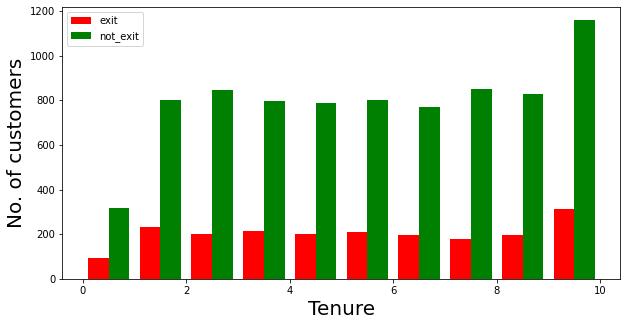

In [56]:
visualization(df_churn_exited, df_churn_not_exited, "Tenure")

In [57]:
df_churn_exited2 = df_churn[df_churn['Exited']==1]['Age']
df_churn_not_exited2 = df_churn[df_churn['Exited']==0]['Age']

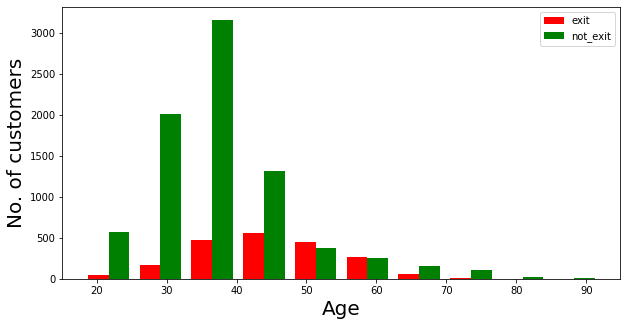

In [58]:
visualization(df_churn_exited2, df_churn_not_exited2, "Age")

In [59]:
cols_to_scale = ['CustomerId','CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_churn[cols_to_scale] = scaler.fit_transform(df_churn[cols_to_scale])

In [61]:
x = df_churn.drop('Exited', axis= 'columns')
y = df_churn['Exited']

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state =1)

In [63]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,),activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5463 - accuracy: 0.7491
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7972
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7972
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8064
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8163
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8270
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8332
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8416
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8439
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3684 - accura

In [65]:
yp = model.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,yp))

ValueError: ignored

In [67]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1585
           1       0.74      0.53      0.61       415

    accuracy                           0.86      2000
   macro avg       0.81      0.74      0.77      2000
weighted avg       0.85      0.86      0.85      2000



Text(69.0, 0.5, 'Truth')

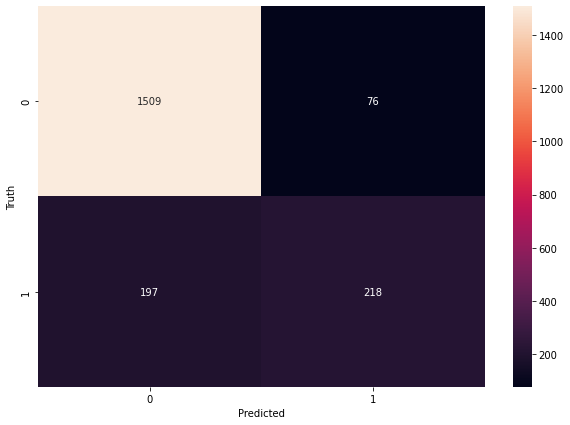

In [69]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
df_churn['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [71]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(x, y)

In [72]:
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [73]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm,y_sm, test_size= 0.2, random_state =1, stratify = y_sm)

In [74]:
model_balanced = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,),activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_balanced.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_balanced.fit(x_train_sm, y_train_sm, epochs=100)

Epoch 1/100
399/399 [==============================] - 4s 5ms/step - loss: 0.6482 - accuracy: 0.6286
Epoch 2/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5972 - accuracy: 0.6796
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5685 - accuracy: 0.7130
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5330 - accuracy: 0.7431
Epoch 5/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5014 - accuracy: 0.7631
Epoch 6/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4842 - accuracy: 0.7712
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4749 - accuracy: 0.7748
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4691 - accuracy: 0.7768
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4659 - accuracy: 0.7768
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4625 - accura

In [75]:
model_balanced.evaluate(x_test_sm, y_test_sm)

100/100 [==============================] - 0s 1ms/step - loss: 0.4185 - accuracy: 0.7994


[0.4185282588005066, 0.799435019493103]

In [76]:
yp = model_balanced.predict(x_test_sm)

In [77]:
y_pred = []
for element in yp:
    if (element > 0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

In [78]:
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1593
           1       0.80      0.80      0.80      1593

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



Text(69.0, 0.5, 'Truth')

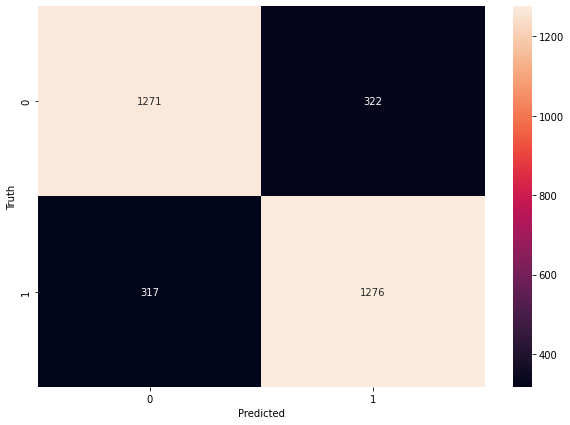

In [79]:
cm_bal = tf.math.confusion_matrix(labels=y_test_sm,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm_bal, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')